<h1 style="text-align: center;">
<span style= 'color : lime'> Analytic Model for Estimating Light Collection Efficiency </span>
 </h1>
 <hr>
 <br>

$$
LCE = \frac{X}{1-(s+w)} 
$$
<br>
$$ LCE = \frac{f_{sen}FF_{sys}(1-R)}{1-( f_{sen}R + (1-f_{sen})R_{wall} )} $$
<br>
<p style= "font-size:16pt; text-align: center;"> <mark style=" background-color: red; color: black;"> It is *NOT* recommended to change this document. This copy is kept only for documentation of Shawn's calculations for Darkside veto. </mark> 
<br>
<mark style="background-color: lime; color: black;"> Use Light_Yield_Analytic_Model.ipynb for all other purposes. </mark> </p>
<p style= "text-align: center;">
<br>
<span style = 'color:tomato'> 
    Relevant Documentation: 
<a href="https://www.overleaf.com/read/vpkvkgpfqwst">https://www.overleaf.com/read/vpkvkgpfqwst</a>
    
</span>
</p>
<p style= "text-align: center;">
<br>
<span style = 'color:tomato'> 
    Research Notes: 
<a href="https://docs.google.com/document/d/1k-8OMUld0fGFGO-Om6wp_pJkQwOL-QxgrfYoKsZIPF4/edit">Google Docs link </a>
    
</span>
</p>

In [1]:
###

## LY is light collection multiplied by Scintillation yield and PDE
## the end result of all the calculations in this note book provide us Light Yield. I am calling some intermediate variables as Light Yield even though it strictly isn't light yield

## define a funtion to calculate light yield from the parameters
## wavelengths in nm throughout this notebook
## reflectivity represented as a decimal

# %matplotlib qt
%matplotlib inline

from os import path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# %matplotlib qt

def calc_LY(PDE, f_sen, FF_sys, R, R_wall):

    s = f_sen*(R)
    w = (1-f_sen)*R_wall
    X = f_sen*FF_sys*(1-R)
    LY = PDE*X/(1-(s+w)) ### This Expression is basically all there is in the Analytic Model.
                        ### Note in order to obtain Light yield we will have to multiply result of calc_LY by scintillation Yield
                         ### for derivation of the expression see overleaf document where expressions are named correctly.
    return LY
# LY1 = calc_LY()
# print('LY1: ', LY1)

In [2]:
calc_LY(0.18*1.4, 0.3, 0.95, 0.22, 0.5)

0.09592397260273972

In [3]:
# for 2PAC configuration
# PDE = 0.47
# f_sen = 0.012
# FF_sys = 1
# R = 0.17
# R_wall = 0.95
calc_LY(0.47, 0.012, 1, 0.17, 0.95)

0.07886118598382753

Text(0, 0.5, 'LC')

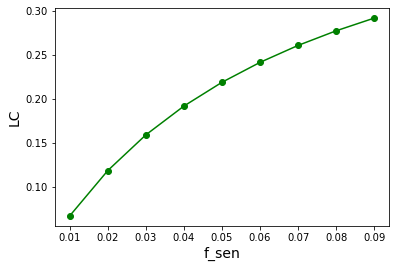

In [4]:
# Plots 
# LY on Y-axis 
# one of the parameters on the x-axis

f_sen_vector = np.arange(0.01, 0.1, 0.01)
plt.figure('f_sen vs LC')
plt.plot(f_sen_vector, calc_LY(0.47, f_sen_vector, 1, 0.17, 0.95), '-og')
plt.xlabel('f_sen', size=14, weight = 'bold')
plt.ylabel('LC', size=14, weight = 'bold')
# plt.title('f_sen vs LC')

Text(0.5, 1.0, 'R_Wall vs LC')

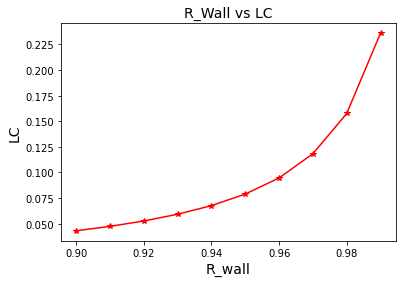

In [5]:
R_wall_vector = np.arange(0.9, 1.0, 0.01)
plt.figure(2)
plt.plot(R_wall_vector, calc_LY(0.47,0.012, 1, 0.17, R_wall_vector), '-*r')
plt.xlabel('R_wall', size=14, weight = 'bold')
plt.ylabel('LC', size =14, weight = 'bold')
plt.title('R_Wall vs LC', size =14, weight = 'bold' )

Text(0.5, 1.0, 'R vs LC')

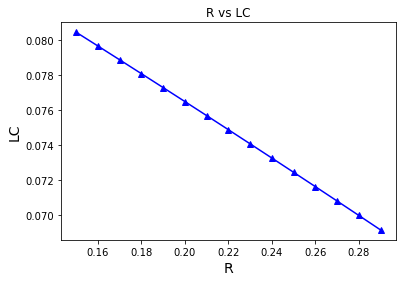

In [6]:
R = np.arange(0.15, 0.3, 0.01)
plt.figure(3)
plt.plot(R, calc_LY(0.47,0.012, 1, R, 0.95), '-^b')
plt.xlabel('R', size= 14, weight = 'bold')
plt.ylabel('LC', size= 14, weight = 'bold')
plt.title('R vs LC')

In [7]:
# # different values of f_sen and R_wall simultaneously
# LY_vector =[]
# for value_f_sen in f_sen_vector:
#     for value_R_wall in R_wall_vector:
#         LY_vector.append(calc_LY(0.47, value_f_sen, 1, 0.17, value_R_wall))
# plt.plot(LY_vector, label = 'Values')
# plt.legend()
# plt.xlabel('index')
# plt.ylabel('LY')

In [8]:
# implement wavelength dependence
# Generated photon --> 128 nm
# WLS --> gives a spectrum (Emission Spectra)
# R, R_wall and PDE will become wavelength dependent
# R_wall is taken to be the reflectivity of WLS alone (for the time being)
# What about secondary affects of WLS --> does visible light interacting with WLS also get wavlength shifted?
# Wavelength range?
# Treat all wavelengths independently
# Compute the wavelength dependent LY for entire wavelength range
# integrate and normalize LY for the entire wavelength range
# compute and compare PEN and TPB performances
# emission spectrum --> wavelength dependent reflectivities --> wavelength dependent PDE 

In [9]:
### fixed values for FF_sys and f_sen
# in case of 2PAC
# PDE = 0.47
# f_sen = 0.012
# FF_sys = 1
# R = 0.17
# R_wall = 0.95
FF_sys = 1
f_sen = 0.012

In [10]:
### Vectors
# wavelength_vector
# E(lambda)
# R
# R_wall_PEN
# R_wall_TPB
# PDE

<h2 style = 'text-align:center'>
    <span style = 'color: Orange '> Integration over the relevant Wavelength range </span>
</h2>

<p> 
    <span style = 'color: #66AAEE; font-size: 18pt'>To Load Data : </span>
    <br>
    Give location of project directory defined by variable project_dir.
    <br>
    inside project directory, folder named Data contains all the relavant data files
</p>

In [11]:
### define project directory

# project_dir = r'C:\Users\sarth\OneDrive\one_work\LY_Analytic_Model'
project_dir = r'C:\Users\sarth\projects\LY_Analytic_Model';

## <span style = 'color: magenta'> Wavelength Range </span>

In [12]:
## Question: how to choose common wavelength region to be used for ,full fledge calcualtion
## Answer: check all data and find out the common range
from numpy import arange
# wavelength_vector = arange(305, 560, 0.5) ### for PDE data given by Marcin
wavelength_vector = arange(366, 560, 0.5) ### for PDE data for new generation SiPM given by cenk

## <span style = 'color : magenta'> SiPM Reflectance data </span>

In [13]:
# Si_file= pd.read_excel(r'D:\D Downloads\Current_work\Reflectivity measurement\SiPM_Rrel_corrected.xlsx')
# R = Si_file.drop(['Unnamed: 1', 'SiPM_whitebgr_HR1 - Storage 134120', 'Unnamed: 3', 'SiPM_black - Storage 134701', 'Unnamed: 5', 'Unnamed: 6', 'Surface area corrected', 'Unnamed: 9', 'Corrected "to align"', 'Unnamed: 11'], axis =1)[1:] 
## keeping just the white background reflectivity * to be verified
## newly measured values
# R_vector = pd.read_csv(r'D:\D Downloads\Current_work\Reflectivity measurement\sipm_hr1_processed.txt', sep = '\t') 

### documentation 
R_vector = pd.read_csv(path.join(project_dir, 'Data','sipm_hr1_processed.txt'), sep = '\t')  ## 'Data' is the name of the folder containing Data files
R_values = R_vector.copy()
R_values['R'] = [int(value)/100 for value in R_vector['R']]
# R_values

## <span style = 'color : magenta'> PEN Reflectance data </span>

In [14]:
# R_wall_PEN = 
photon_energy = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,
2.884,2.918,2.952,2.988,3.024,3.039,3.047,3.054,3.062,3.069,3.077,3.085,3.092,3.100,3.108,3.116,3.123,3.131,3.139,3.147,3.155,
3.163,3.171,3.179,3.188,3.196,3.204,3.212,3.221,3.263, 8.0] # energy in eV

PEN_reflectivity = [100.130, 100.130,99.995,99.856,99.681,99.659,99.569,99.351,99.306,99.018,98.652,98.415,98.283,
98.018,97.856,97.606,97.457,97.134,96.928,96.827,96.247,95.737,95.359,95.197,95.048,94.876,94.684,94.463,94.055,93.650,93.147,
92.562,91.812,90.904,89.807,88.506,86.957,85.242,83.156,80.678,77.811,74.615,71.004,67.089,62.924,58.670,20.000, 20.000] # %age reflectivity

PEN_reflectivity = [reflectivity*0.98*0.994/100 for reflectivity in PEN_reflectivity] # Reflectance is multiplied by 0.98 and 0.994 for calibration purpose
# The calculation is very senstitive to Reflectance

photon_wavelength = []

for energy_ in photon_energy:
    length_ = 1239.847/energy_
    photon_wavelength.append(length_)

frame = {'photon_wavelength': photon_wavelength,
        'PEN_reflectivity': PEN_reflectivity}

R_Wall_PEN = pd.DataFrame(frame)

## reverse the order of wavelength smaller to bigger
R_Wall_PEN = R_Wall_PEN.iloc[::-1]

# R_Wall_PEN

In [15]:
# R_Wall_PEN

## <span style = 'color : magenta'> TPB Reflectance data </span>

In [16]:
photon_energy = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,2.884,2.918,2.952,2.988,3.024, 3.221,3.263, 8.0]
TPB_reflectivity = [98.936,98.936,99.180,99.309,99.375,99.392,99.534,99.490,99.491,99.685,99.635,99.593,99.541,99.457,99.380,99.374,99.196,98.924,98.521,97.653,95.581,92.569,13.0,3.0,3.0]

photon_wavelength = []

TPB_reflectivity = [reflectivity*0.98*0.994/100 for reflectivity in TPB_reflectivity]

for energy_ in photon_energy:
    length_ = 1239.847/energy_
    photon_wavelength.append(length_)

frame = {'photon_wavelength': photon_wavelength,
        'TPB_reflectivity': TPB_reflectivity}

R_Wall_TPB = pd.DataFrame(frame)

## reverse the order of wavelength smaller to bigger
R_Wall_TPB = R_Wall_TPB.iloc[::-1]

# R_Wall_TPB

<h2 style = 'text-align: left'>
    <span style = "color : Magenta"> SiPM PDE data </span>
</h2>

In [17]:
### FBK PDE values sent by Marcin
# photon_wavelegnth = [285.87, 301.14, 320.99, 340.83, 365.26, 380.53, 391.22, 400.38, 411.06, 420.22, 435.49, 449.23, 464.50, 499.61, 588.16, 698.09]

# PDE_vector = [18.39, 37.24, 41.87, 42.43, 45.03, 48.12, 52.72, 52.75, 52.77, 52.29, 48.77, 46.26, 40.71, 38.76, 28.82, 18.93] # %age values

### LFoundry PDE Values sent by Cenk
photon_wavelegnth = [365.39, 390.34, 399.89, 409.98, 420.06, 434.93, 450.32, 500.21, 525.16, 545.33, 590.98, 630.25, 700.32]

PDE_vector = [43.277, 51.892, 54.257, 52.399, 50.709, 46.993, 42.601, 36.014, 30.439, 28.581, 24.358, 20.473, 15.574]


PDE_values = [value/100 for value in PDE_vector]
frame = {'photon_wavelegnth':photon_wavelegnth, 'PDE_': PDE_values}

PDE = pd.DataFrame(frame)

# PDE

## <span style = "color : Magenta"> TPB Emission Spectrum </span>

In [18]:
#### why do we have negative values?
#### Might need to clean data
## drop negative values
## normalize efficiency

# r_TPB = r'D:\D Downloads\Current_work\tpb-fran.txt'
r_TPB = path.join(project_dir, 'Data','tpb-fran.txt')
emission_spectrum_TPB = pd.read_csv(r_TPB, sep ='\t')

E_TPB = emission_spectrum_TPB.drop(['a','b','c','d'], axis=1)
# E_TPB

<p> <span style = "font-size: 18pt; color: Red"> Warning: </span> TPB data has negative values!!! </p>

In [19]:
# normalize : divide by maximum value
E_TPB['efficiency'] = E_TPB['efficiency']/max(E_TPB['efficiency'] ) 
# remove negative values
E_TPB = E_TPB[E_TPB > 0].dropna()

# E_TPB


## <span style = "color : Magenta"> PEN Emission Spectrum </span>

In [20]:
# r_PEN = r'D:\D Downloads\Current_work\pen-tess.txt'
r_PEN = path.join(project_dir, 'Data', 'pen-tess.txt')
emission_spectrum_PEN = pd.read_csv(r_PEN, sep ='\t')

E_PEN = emission_spectrum_PEN.drop(['a','b','c'], axis=1)

# E_PEN

In [21]:
# normalize : divide by maximum value
E_PEN['efficiency'] = E_PEN['efficiency']/max(E_PEN['efficiency'] ) 

# remove negative values
E_PEN = E_PEN[E_PEN > 0].dropna()
# E_PEN
## What are the units of efficiency? Normalize PEN Spectrum ??
## Remove negative values?
## Need linear interpolation for everyuthing R, R_Wall, PDE and emission spectrum

<h2>
    <span style = 'color:skyblue; text-align:center'> Pre-processing data for interpolation </span>
</h2>

In [22]:
## use scipy to interpolate and store in DataFrame 
from scipy.interpolate import interp1d
f_R_Wall_TPB = interp1d(R_Wall_TPB['photon_wavelength'], R_Wall_TPB['TPB_reflectivity'])
R_Wall_TPB_uniform = f_R_Wall_TPB(wavelength_vector)

f_R_Wall_PEN = interp1d(R_Wall_PEN['photon_wavelength'], R_Wall_PEN['PEN_reflectivity'])
R_Wall_PEN_uniform = f_R_Wall_PEN(wavelength_vector)

f_E_PEN = interp1d(E_PEN['wavelength'], E_PEN['efficiency'])
E_PEN_uniform = f_E_PEN(wavelength_vector)

f_E_TPB = interp1d(E_TPB['wavelength'], E_TPB['efficiency'])
E_TPB_uniform = f_E_TPB(wavelength_vector)

f_PDE = interp1d(PDE['photon_wavelegnth'], PDE['PDE_'])
PDE_uniform = f_PDE(wavelength_vector)

f_R_values = interp1d(R_values['Wavelength'], R_values['R'])
R_values_uniform = f_R_values(wavelength_vector)

<h2 style= 'text-align: center'>
    <span style  = 'color: orange'>  Wavelength Dependent  </span> <span style = "color: red"> LY </span>
</h2>

<!-- <p style = 'font-size:14pt'>  -->
<p style= ' font-size:14pt; text-align: left; color:white;'>
Use values stored in DataFrame directly in the formula below:
</p>

<span style = 'color : violet;'>

$$
LY = \frac{\sum[ E_{pen}(\lambda)*LY(PDE(\lambda), f_{sen}, FF_{sys}, R(\lambda), R_{wall}(\lambda))]}{\sum E_{pen}(\lambda)}
$$
</span>
<!-- </p> -->

In [23]:
# ## Calculating LY for PEN
# f1 = 0
# f2 = 0

# for lambda_index in range(np.size(wavelength_vector)):
#     f1 += E_PEN_uniform[lambda_index]*calc_LY(PDE_uniform[lambda_index], f_sen, FF_sys, R_values_uniform[lambda_index], R_Wall_PEN_uniform[lambda_index])
#     f2 += (E_PEN_uniform[lambda_index])
# print('Light Yield():', f1/f2)

<br>
<h2 style="text-align: center;">
    <span style = "color : yellow "> Function to calculate wavelength dependent Light Yield  </span>
</h2>
<br>

In [24]:
def calc_wavelength_dependent_LY(wavelengths, Emission_spectrum, PDE, f_sen, FF_sys, R, R_wall):
    '''
    The function name is confusing. It calcaulates integrated LY.
    '''
    f1 = 0
    f2 = 0
    
    for lambda_index in range(np.size(wavelength_vector)):
        f1 += Emission_spectrum[lambda_index]*calc_LY(PDE[lambda_index], f_sen, FF_sys, R[lambda_index], R_wall[lambda_index])
        f2 += (Emission_spectrum[lambda_index])
    return f1/f2

In [25]:
print('Light Yield PEN', calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, f_sen, FF_sys, R_values_uniform, R_Wall_PEN_uniform))

Light Yield PEN 0.06495246854586814


In [26]:
print('Light Yield TPB', calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, f_sen, FF_sys, R_values_uniform, R_Wall_TPB_uniform))

Light Yield TPB 0.08760192447377908


Text(0.5, 1.0, 'f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted]')

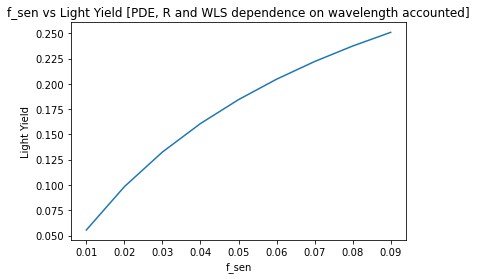

In [27]:
# %matplotlib qt
plt.figure()
plt.plot(f_sen_vector, calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform))
plt.ylabel('Light Yield', weight = 'bold')
plt.xlabel('f_sen', weight = 'bold')
plt.title('f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted]')

In [28]:
calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,0.01, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.99)*40*0.5


0.9602933493548705

In [29]:
calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,0.01, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.99)*40

2.488255223185613

<br>
<h2 style = 'color: orange; text-align:center; font-size:18pt; '>
Data and Plots
</h2>
<br>

Text(0.5, 1.0, 'Wavelength vs PDE')

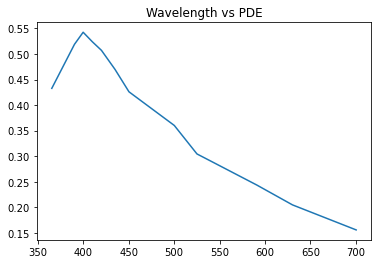

In [30]:
### 1
#PDE
plt.figure()
plt.plot(PDE['photon_wavelegnth'], PDE['PDE_'])
plt.title('Wavelength vs PDE')

Text(0.5, 1.0, 'Wavelength vs Silicon PhotoMultiplier reflectivity')

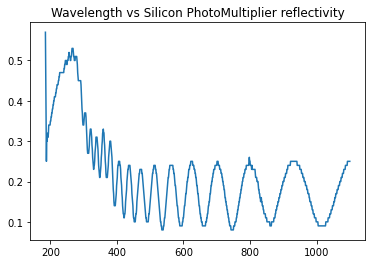

In [31]:
### 2
## R_values
plt.figure()
plt.plot(R_values['Wavelength'], R_values['R'])
## plt.plot(R['black_mask - Storage 135551'],	R['Unnamed: 8']) ### not using this file
plt.title('Wavelength vs Silicon PhotoMultiplier reflectivity')

In [32]:
### 3
# R_Wall_TPB
# TPB reflectivity below 400 nm may not be accurate

Text(0.5, 1.0, 'wavelength vs TPB Reflectiivty')

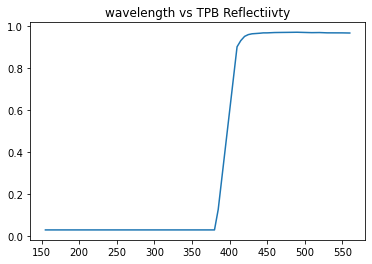

In [33]:
plt.figure()
plt.plot(R_Wall_TPB['photon_wavelength'][:22], R_Wall_TPB['TPB_reflectivity'][:22])
plt.title('wavelength vs TPB Reflectiivty')

In [34]:
### 4
# R_Wall_PEN

Text(0.5, 1.0, 'wavelength vs PEN reflectivity')

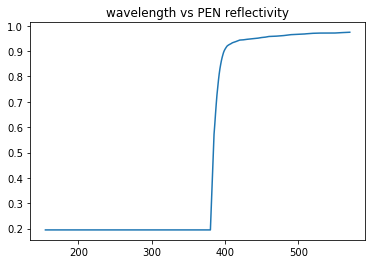

In [35]:
plt.figure()
plt.plot(R_Wall_PEN['photon_wavelength'][:46],	R_Wall_PEN['PEN_reflectivity'][:46])
plt.title('wavelength vs PEN reflectivity')

In [36]:
### 5
# E_TPB

Text(0.5, 1.0, 'TBP Emission spectrum')

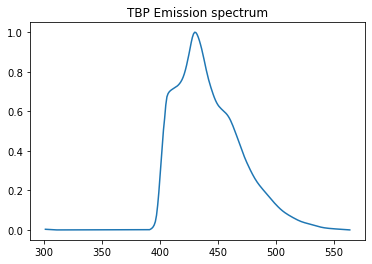

In [37]:
plt.figure()
plt.plot(E_TPB['wavelength'], E_TPB['efficiency'])
plt.title('TBP Emission spectrum')

In [38]:
### 6
# E_PEN

Text(0.5, 1.0, 'PEN Emission spectrum')

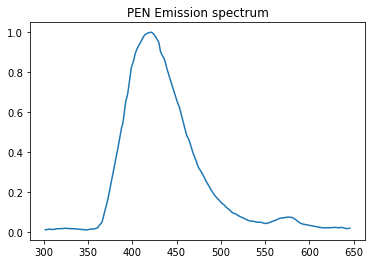

In [39]:
plt.figure()
plt.plot(E_PEN['wavelength'], E_PEN['efficiency'])
plt.title('PEN Emission spectrum')

<h2> <span style = 'color: lightgreen'> Sanity Check </span> </h2>

In [40]:
### use delta function in calc_wavelength_dependent_LY to prove that calculation isn't wrong
### wavelengths, Emission_spectrum, PDE, f_sen, FF_sys, R, R_wall
from scipy import signal
delta_signal = signal.unit_impulse(510,255)
print('sanity check value', calc_wavelength_dependent_LY(wavelength_vector, delta_signal, 0.47*delta_signal,f_sen, FF_sys, 0.17*delta_signal, 0.95*delta_signal))

sanity check value 0.07886118598382753


<h2>
<span style = "color : orange "> f_sen vs Light Yield Plot  </span>
</h2>
<p>
<span style = "color : red ">        Inludes uncertainity in R_Wall measurement </span>
</p>

In [41]:
### Plot of f_sen vs LC?
### include Rwall error budget Rwall and Rwall*0.988
# %matplotlib qt

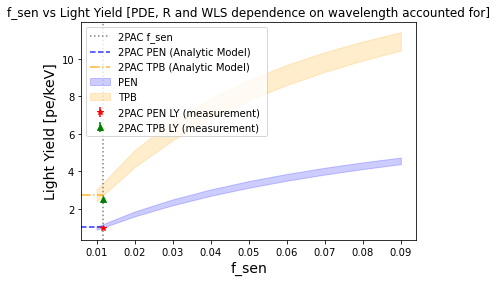

In [42]:
# plt.close('all') # relevant only if using qt for plotting

plt.figure('f_sen vs LY')

LC_PEN_upper = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform)
LC_PEN_lower = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.988)

plt.fill_between(f_sen_vector, LC_PEN_lower, LC_PEN_upper, color='blue', alpha = 0.2, label = 'PEN')

LC_TPB_upper = 40*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_TPB_uniform)
LC_TPB_lower = 40*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988)

plt.fill_between(f_sen_vector, LC_TPB_lower, LC_TPB_upper, color='orange', alpha = 0.2, label = 'TPB')

### vertical line to show f_sen for 2PAC
plt.axvline(0.01176, 0, 1, linestyle = 'dotted', color = 'gray', label='2PAC f_sen')

### horizontal lines correspond to the LY expected from 2PAC according to the Analytic Model
### ??? change f_sens from 0.01176 to 0.01
LC_PEN_2PAC_ref = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.988)
LC_TPB_2PAC_ref = 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988)

plt.axhline(LC_PEN_2PAC_ref, 0, 0.0655, linestyle = '--', color = 'blue', alpha =0.8, label='2PAC PEN (Analytic Model)')
plt.axhline(LC_TPB_2PAC_ref, 0, 0.0655, linestyle = '-.', color = 'orange', alpha =0.8, label='2PAC TPB (Analytic Model)')

### single point to represent TPB yield
plt.errorbar([0.01176], [2.50*0.40], yerr = [0.05*0.40], fmt ='*', color ='red', label = '2PAC PEN LY (measurement) ')
plt.errorbar([0.01176], [2.50], yerr = [0.05], fmt = '^', color ='green', label = '2PAC TPB LY (measurement) ')

plt.ylabel('Light Yield [pe/keV]' , size =14, weight = 'bold')
plt.xlabel('f_sen', size =14, weight = 'bold')
plt.title('f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted for]')
plt.legend(loc = 'upper left')

# plt.savefig(r'C:\Users\sarth\Dropbox\Wavelength_Shifters\f_sen_vs_LC.jpeg')

In [43]:
# Calculating LY for comparison with 2PAC measurement
print( 'lower bound on LY for TPB:', 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988))

lower bound on LY for TPB: 2.7595824522831047


In [44]:
print('Upper bond on LY for TPB:', 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_TPB_uniform*1.00))

Upper bond on LY for TPB: 3.448379177738592


<h2 style = 'color: #ff00ff'> 
    TPB results from paper
</h2>
<body>
<span style = 'color : yellow'> Simulation </span>: 2.6 +- 0.5 pe/keV 
    <br>
<span style = 'color : yellow'>Measurement </span>: 2.50 +- 0.05 pe/keV
</body>

In [45]:
# LY_PEN_2PAC_ref

In [46]:
# LY_TPB_2PAC_ref

In [47]:
# plt.figure('Compare_plots')
# plt.subplot(2,2, 1)
# plt.show('temp0001')
# plt.subplot(2,2, 1)
# plt.show('temp0003')
#### learn either plotly or seaborn or something
#### use object oriented plots

In [48]:
## check values

<h3 style = 'color:#77AAFF; font-size:20pt;'> Shawn 29 Oct 2021 </h3>

In [49]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, R_Wall_PEN_uniform)
LY_value
#### photo electron per keV

0.11904243900112586

In [50]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.002, FF_sys, R_values_uniform, R_Wall_PEN_uniform)
LY_value

0.23451850631387583

In [51]:
0.11904243900112586*0.97*1000
### I believe Shawn and I decided to use factor of 0.97 to account for absorption.

115.47116583109208

<h3 style = 'color:#77AAFF;'> Shawn's Tyvec Reflectance data </h3>

In [52]:
### Tyvec sample 139
Tyvec_139_reflectance_df = pd.read_csv(path.join(project_dir, 'Data','Sample139.Sample.csv'), sep = ',')  ## 'Data' is the name of the folder containing Data files
Tyvec_139_reflectance_values = Tyvec_139_reflectance_df.copy()
Tyvec_139_reflectance_values = Tyvec_139_reflectance_df.iloc[::-1]
Tyvec_139_reflectance_values['R' ] = Tyvec_139_reflectance_values['R']/100
### Tyvec sample 115
Tyvec_115_reflectance_df = pd.read_csv(path.join(project_dir, 'Data','Sample115.Sample.csv'), sep = ',')  ## 'Data' is the name of the folder containing Data files
Tyvec_115_reflectance_values = Tyvec_115_reflectance_df.copy()
Tyvec_115_reflectance_values = Tyvec_115_reflectance_df.iloc[::-1]
Tyvec_115_reflectance_values['R' ] = Tyvec_115_reflectance_values['R']/100

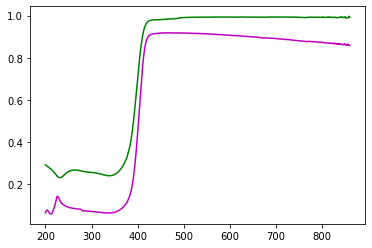

In [53]:
plt.figure()
plt.plot(Tyvec_115_reflectance_values['Wavelength'], Tyvec_115_reflectance_values['R'], '-g')
plt.plot(Tyvec_139_reflectance_values['Wavelength'], Tyvec_139_reflectance_values['R'], '-m')

In [54]:
# Tyvec_139_reflectance_values
# Tyvec_115_reflectance_values

In [55]:
# interpolation
f_Tyvec_115_reflectance_values = interp1d(Tyvec_115_reflectance_values['Wavelength'], Tyvec_115_reflectance_values['R'])
Tyvec_115_reflectance_values_uniform = f_Tyvec_115_reflectance_values(wavelength_vector)

f_Tyvec_139_reflectance_values = interp1d(Tyvec_139_reflectance_values['Wavelength'], Tyvec_139_reflectance_values['R'])
Tyvec_139_reflectance_values_uniform = f_Tyvec_139_reflectance_values(wavelength_vector)

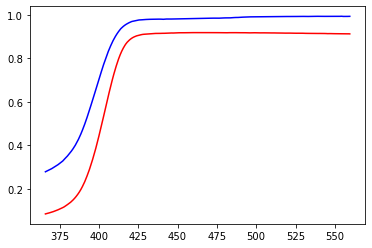

In [56]:
# %matplotlib qt
plt.plot(wavelength_vector, Tyvec_115_reflectance_values_uniform, '-b')
plt.plot(wavelength_vector, Tyvec_139_reflectance_values_uniform, '-r')

In [57]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, Tyvec_139_reflectance_values_uniform)
LY_value*1000*0.97

54.307603635633015

In [58]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, Tyvec_115_reflectance_values_uniform)
LY_value*1000*0.97

233.68267442258968

<p style = 'color:yellow;font-size:14pt;' > <span style = 'color:magenta'>Shawn : </span> next step would be to just assume we have coated both the inner walls of cryostat as well as the outer walls of the titanium vessel with PEN and then calculate the Light Yield </p>

<p style = 'color:skyblue; font-size:16pt'> 
Case: When Tyvec has reflectance of 95% for wavelength >= 400nm and zero below 400
</p>

In [59]:
Tyvec_thresh_400_values =  [0.95 if lambdal > 399 else 0 for lambdal in wavelength_vector]

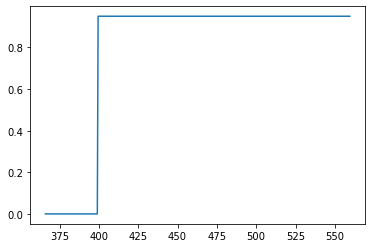

In [60]:
plt.plot(wavelength_vector, Tyvec_thresh_400_values)

In [61]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, Tyvec_thresh_400_values)
LY_value*1000*0.97

113.96903560290804

<p  style = 'color:skyblue; font-size:16pt'> if roof has no PEN </p>

In [62]:
# roof is not coated with PEN
# surface area of roof is 1/6 of total surface area
# reflectance of the bare roof is 20%
# we calculate effective_reflectance of chamber as below
# 
# 
# 
effective_reflectance_400 = (1*0.2 + 5 * 0.95)/6

In [63]:
Tyvec_thresh_400_values =  [effective_reflectance_400 if lambdal > 399 else 0 for lambdal in wavelength_vector]

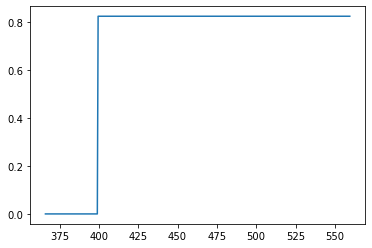

In [64]:
plt.plot(wavelength_vector, Tyvec_thresh_400_values)

In [65]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, Tyvec_thresh_400_values)
LY_value*1000*0.97

33.8228795011742

<p  style = 'color:skyblue; font-size:16pt'> if roof has no PEN and reflectance from Sample 115 </p>

In [66]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, Tyvec_115_reflectance_values_uniform)
LY_value*1000*0.97

233.68267442258968

In [67]:
effective_reflectance_115 = (1*0.2 + 5* Tyvec_115_reflectance_values_uniform)/6;

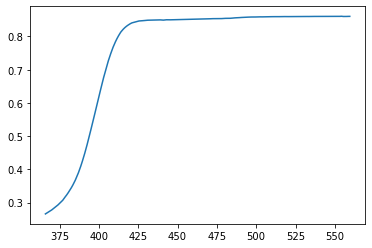

In [68]:
plt.plot(wavelength_vector, effective_reflectance_115)

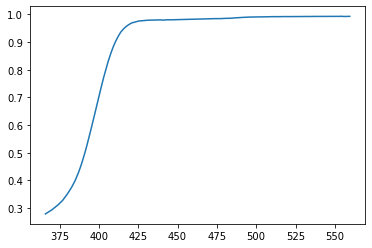

In [69]:
plt.plot(wavelength_vector, Tyvec_115_reflectance_values_uniform)

In [70]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, effective_reflectance_115)
LY_value*1000*0.97
# LY_value

36.40470068218431

<p  style = 'color:skyblue; font-size:16pt'> if roof has no PEN and reflectance from Sample 139 </p>

In [71]:
effective_reflectance_139 = (1*0.2 + 5* Tyvec_139_reflectance_values_uniform)/6;

In [72]:
LY_value = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.001, FF_sys, R_values_uniform, effective_reflectance_139)
LY_value*1000*0.97
# LY_value

25.874803133542144

Text(0.5, 0, 'f_sen')

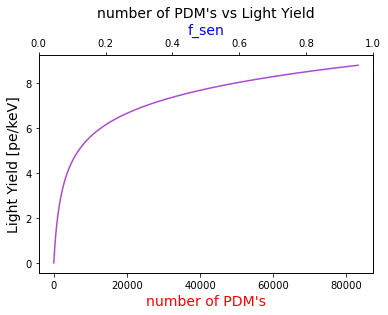

In [73]:
### Number of PDM's required 
### added on 16 Nov 2021
### use sample 115

# %matplotlib qt
# plt.close('Number of PDM\'s vs LY')
# plt.figure('Number of PDM\'s vs LY')
area_PDM = (0.05)**2;
# carpet_area = (7.9*8.548 + 7.9*8.548 + 8.548*8.548) + (2*np.pi*(4.6/2)*(0.91688));
carpet_area = (7.9*8.548 + 7.9*8.548 + 8.548*8.548) ;
max_number_PDM = carpet_area/area_PDM ;
number_PDM = np.arange(1, np.ceil(max_number_PDM));
new_f_sen = (area_PDM/carpet_area)*number_PDM;

fig, ax1 = plt.subplots()
ax1.plot( number_PDM, 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, new_f_sen, FF_sys, R_values_uniform, Tyvec_115_reflectance_values_uniform) , color =  '#AD4AD2')
ax1.set_ylabel('Light Yield [pe/keV]' , size =14, weight = 'bold')
ax1.set_xlabel('number of PDM\'s', size =14, weight = 'bold', color = 'red')
ax1.set_title('number of PDM\'s vs Light Yield' ,  size =14, weight = 'bold')

ax2 = ax1.twiny()
ax2.set_xlabel('f_sen',  size =14, weight = 'bold', color = 'blue')